In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

from sklearn.linear_model import LinearRegression

Изобретаем датасет.
Это будет данны о стоимости авто, расход топлива, объем двигателя и возраст.
Будем считать, что стоимость авто пропорционально произведению объема двигателя на расход и обратно пропорциональна её возрасту и умножим на 100 чтобы получить красивое число.

In [13]:
n_samples = 1000

car_years_old = np.random.choice(20, n_samples) + 1
car_engine_capacity = np.random.choice(400, n_samples) + 90
car_fuel_flow = np.random.choice(30, n_samples) + 4

car_price = ((car_engine_capacity * car_fuel_flow) / car_years_old) * 100

data = pd.DataFrame({'car_years_old': car_years_old, 'car_engine_capacity': car_engine_capacity, 
                     'car_fuel_flow': car_fuel_flow, 'car_price': car_price})
data.head(5)

,car_years_old,car_engine_capacity,car_fuel_flow,car_price
0,9,453,26,130866.666667
1,7,308,30,132000.000000
2,14,202,10,14428.571429
3,4,170,9,38250.000000
4,17,488,10,28705.882353


Посмотрим вес параметров 

In [14]:
from sklearn.metrics import mean_absolute_error

X = data[['car_years_old', 'car_engine_capacity', 'car_fuel_flow']]
y = data['car_price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['car_years_old', 'car_engine_capacity', 'car_fuel_flow']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-14869.80136115    301.26942701   5612.98694584]
Bias: 68269.90787693308
Error: 72939.52225949062


car_years_old - сильно влияет на стоимость в отрицательную сторону, чем старше тем стоимость ниже видимо

car_engine_capacity - влияет но не сильно

car_fuel_flow - сильно влияет



In [15]:
# посмотрим какие стоимости авто получились
y.head()

0    130866.666667
1    132000.000000
2     14428.571429
3     38250.000000
4     28705.882353
Name: car_price, dtype: float64

In [8]:
res = y - pred_values
res.head()

0    -7370.286008
1     2536.065006
2    -8057.581584
3    -8245.096621
4    10409.555931
Name: car_price, dtype: float64

Очень большое значение ошибки и отклонения... Нужно убрать выбросы наверно

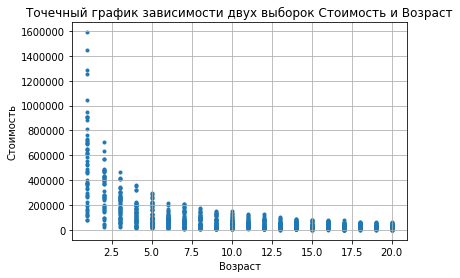

In [42]:
# посмотрим на графике зависимость Стоимости от Возраста
x = data['car_years_old']
y = data['car_price']

plt.xlabel('Возраст')
plt.ylabel('Стоимость')
plt.title('Точечный график зависимости двух выборок Стоимость и Возраст')
plt.grid(True)
plt.scatter(x, y, marker='.')

In [31]:
# проверяем все данные на пустые значения
print(data['car_price'].isnull().sum())
print(data['car_years_old'].isnull().sum())
print(data['car_engine_capacity'].isnull().sum())
print(data['car_fuel_flow'].isnull().sum())

0
0
0
0


In [37]:
# смотрим медиану, минимальтное и максимальное згначение
print('Медиана - ',statistics.median(data['car_price']))
print('Мин - ',min(data['car_price']))
print('Макс - ',max(data['car_price']))

Медиана -  48960.0
Мин -  3211.7647058823527
Макс -  1587300.0


Максимально очень далеко от медианы, значит надо выкинуть некоторые максимальные значения. Видимо какие-то аномалии в данные, которые искажают картину.

In [47]:
# Посмотрим сколько авто стоимость больше 1 млн 
data.loc[data['car_price'] > 1000000]

,car_years_old,car_engine_capacity,car_fuel_flow,car_price,car_new_ft
186,1,432,29,1252800.0,12528
214,1,451,32,1443200.0,14432
689,1,474,22,1042800.0,10428
899,1,481,33,1587300.0,15873
907,1,458,28,1282400.0,12824


Совсем мало. Нужно их убирать из данных.

In [48]:
data_new = data.loc[data['car_price'] < 1000000]
data_new.head()

,car_years_old,car_engine_capacity,car_fuel_flow,car_price,car_new_ft
0,9,453,26,130866.666667,11778
1,7,308,30,132000.000000,9240
2,14,202,10,14428.571429,2020
3,4,170,9,38250.000000,1530
4,17,488,10,28705.882353,4880


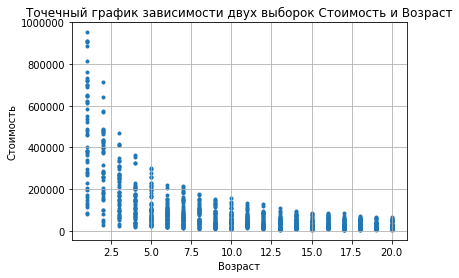

In [49]:
# посмотрим на графике зависимость Стоимости от Возраста
x = data_new['car_years_old']
y = data_new['car_price']

plt.xlabel('Возраст')
plt.ylabel('Стоимость')
plt.title('Точечный график зависимости двух выборок Стоимость и Возраст')
plt.grid(True)
plt.scatter(x, y, marker='.')

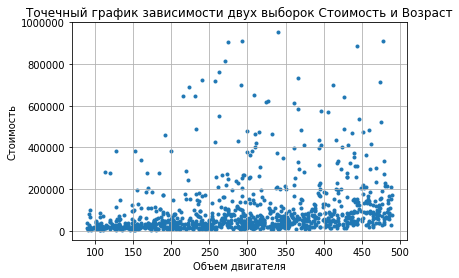

In [51]:
# посмотрим на графике зависимость Стоимости от Объема двигателя
x = data_new['car_engine_capacity']
y = data_new['car_price']

plt.xlabel('Объем двигателя')
plt.ylabel('Стоимость')
plt.title('Точечный график зависимости двух выборок Стоимость и Возраст')
plt.grid(True)
plt.scatter(x, y, marker='.')

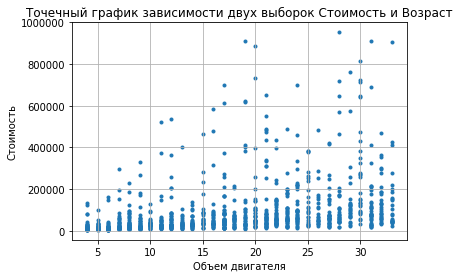

In [52]:
# посмотрим на графике зависимость Стоимости от Расхода топлива
x = data_new['car_fuel_flow']
y = data_new['car_price']

plt.xlabel('Объем двигателя')
plt.ylabel('Стоимость')
plt.title('Точечный график зависимости двух выборок Стоимость и Возраст')
plt.grid(True)
plt.scatter(x, y, marker='.')

Графики зависимостей обхема двигателя и расход топлива очень похожи, можно объеденить их в одну фичу.

In [56]:
data_new['car_new_ft'] = data_new['car_engine_capacity'] * data_new['car_fuel_flow']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
X = data_new[['car_new_ft']]
y = data_new['car_price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data_new[['car_new_ft']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [16.75948646]
Bias: 7380.540661519757
Error: 72524.44605008948


Всё равно какая-то огромное значение ошибки. Нужно проверить данные влтияние возраста слишко высоко.

In [128]:
# перерасчитаем цену
new_car_price = ((car_engine_capacity * car_fuel_flow) * (car_years_old*0.2)) * 100

new_data = pd.DataFrame({'car_years_old': car_years_old, 'car_engine_capacity': car_engine_capacity, 
                     'car_fuel_flow': car_fuel_flow, 'new_car_price': new_car_price})
new_data['car_new_ft'] = new_data['car_engine_capacity'] * new_data['car_fuel_flow']
new_data.head(5)

,car_years_old,car_engine_capacity,car_fuel_flow,new_car_price,car_new_ft
0,9,453,26,2120040.0,11778
1,7,308,30,1293600.0,9240
2,14,202,10,565600.0,2020
3,4,170,9,122400.0,1530
4,17,488,10,1659200.0,4880


In [129]:
X = new_data[['car_new_ft']]
y = new_data['new_car_price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(new_data[['car_new_ft']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [186.51961959]
Bias: 84606.92987405614
Error: 537658.412205109


In [130]:
res = y - pred_values
res.head()

0   -161395.009444
1   -514448.214916
2    104223.438547
3   -247581.947852
4    664377.326511
Name: new_car_price, dtype: float64

Что не получается снизить влияние возраста авто на его стоимость... Возможно потому что не линейния зависимость в формуле.